In [ ]:
# main libraries
import pandas as pd
import numpy as np
import time
# visual libraries
from matplotlib import pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D 
plt.style.use('ggplot')
# sklearn libraries
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score,matthews_corrcoef,classification_report,roc_curve
from sklearn.externals import joblib
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [69]:
# Read the data in the CSV file using pandas
df = pd.read_csv('./covid19-symptoms-checker/Cleaned-Data.csv')
df.head()

,Fever,Tiredness,Dry-Cough,Difficulty-in-Breathing,Sore-Throat,None_Sympton,Pains,Nasal-Congestion,Runny-Nose,Diarrhea,...,Gender_Male,Gender_Transgender,Severity_Mild,Severity_Moderate,Severity_None,Severity_Severe,Contact_Dont-Know,Contact_No,Contact_Yes,Country
0,1,1,1,1,1,0,1,1,1,1,...,1,0,1,0,0,0,0,0,1,China
1,1,1,1,1,1,0,1,1,1,1,...,1,0,1,0,0,0,0,1,0,China
2,1,1,1,1,1,0,1,1,1,1,...,1,0,1,0,0,0,1,0,0,China
3,1,1,1,1,1,0,1,1,1,1,...,1,0,0,1,0,0,0,0,1,China
4,1,1,1,1,1,0,1,1,1,1,...,1,0,0,1,0,0,0,1,0,China


In [3]:
df.shape

(316800, 27)

In [4]:
df.isnull().any().sum()

0

In [5]:
All = df.shape[0]
positive = df[df['Dry-Cough'] == 1]
negative = df[df['Dry-Cough'] == 0]

x = len(positive)/All
y = len(negative)/All

print('positive  :',x*100,'%')
print('negative :',y*100,'%')

positive  : 56.25 %
negative : 43.75 %


Text(0, 0.5, 'Frequency')

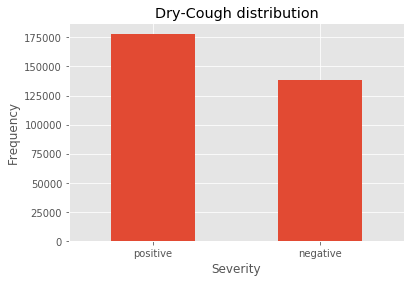

In [6]:
# Let's plot the Dry cough severity against the Frequency
labels = ['positive','negative']
graph = pd.value_counts(df['Dry-Cough'], sort = True)
graph.plot(kind = 'bar', rot=0)
plt.title("Dry-Cough distribution")
plt.xticks(range(2), labels)
plt.xlabel("Severity")
plt.ylabel("Frequency")

In [7]:
All = df.shape[0]
positive = df[df['Pains'] == 1]
negative = df[df['Pains'] == 0]

x = len(positive)/All
y = len(negative)/All

print('positive  :',x*100,'%')
print('negative :',y*100,'%')

positive  : 36.36363636363637 %
negative : 63.63636363636363 %


Text(0, 0.5, 'Frequency')

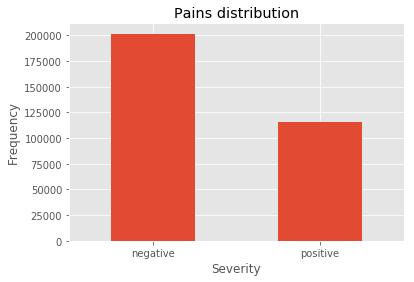

In [8]:
labels = ['negative','positive']
graph = pd.value_counts(df['Pains'], sort = True)
graph.plot(kind = 'bar', rot=0)
plt.title("Pains distribution")
plt.xticks(range(2), labels)
plt.xlabel("Severity")
plt.ylabel("Frequency")

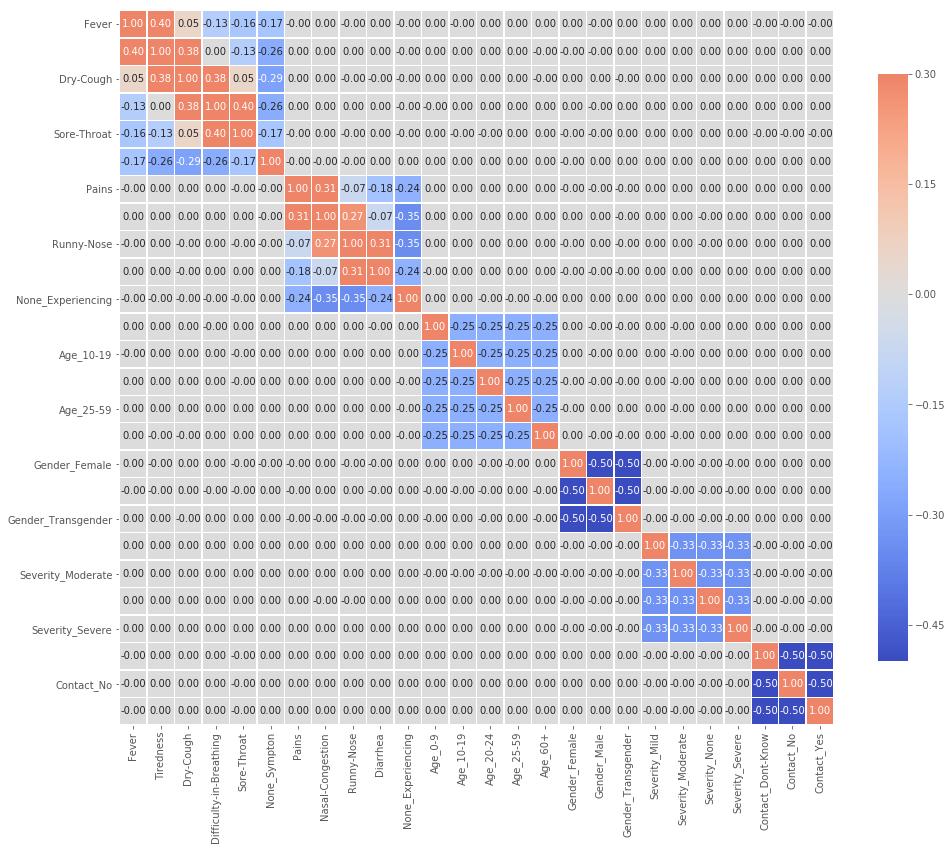

In [22]:
#correlation

corr = df.corr()
g = sns.heatmap(corr,  vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .6}, annot=True, fmt='.2f', cmap='coolwarm')
sns.despine()
g.figure.set_size_inches(16,18)
    
plt.show()

In [23]:
#g = sns.pairplot(filtered_df[['Fever','SprintSpeed','Potential','Wage','Club']],hue = 'Club')

df.describe()
#sb.pairplot(data)

,Fever,Tiredness,Dry-Cough,Difficulty-in-Breathing,Sore-Throat,None_Sympton,Pains,Nasal-Congestion,Runny-Nose,Diarrhea,...,Gender_Female,Gender_Male,Gender_Transgender,Severity_Mild,Severity_Moderate,Severity_None,Severity_Severe,Contact_Dont-Know,Contact_No,Contact_Yes
count,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,...,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000
mean,0.312500,0.500000,0.562500,0.500000,0.312500,0.062500,0.363636,0.545455,0.545455,0.363636,...,0.333333,0.333333,0.333333,0.250000,0.250000,0.250000,0.250000,0.333333,0.333333,0.333333
std,0.463513,0.500001,0.496079,0.500001,0.463513,0.242062,0.481046,0.497930,0.497930,0.481046,...,0.471405,0.471405,0.471405,0.433013,0.433013,0.433013,0.433013,0.471405,0.471405,0.471405
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.500000,1.000000,0.500000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,0.250000,0.250000,0.250000,0.250000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [67]:

graph = df.apply(lambda x: x.value_counts()).T.stack()
print(graph)

Fever                    0                     217800.0
                         1                      99000.0
Tiredness                0                     158400.0
                         1                     158400.0
Dry-Cough                0                     138600.0
                         1                     178200.0
Difficulty-in-Breathing  0                     158400.0
                         1                     158400.0
Sore-Throat              0                     217800.0
                         1                      99000.0
None_Sympton             0                     297000.0
                         1                      19800.0
Pains                    0                     201600.0
                         1                     115200.0
Nasal-Congestion         0                     144000.0
                         1                     172800.0
Runny-Nose               0                     144000.0
                         1                     1

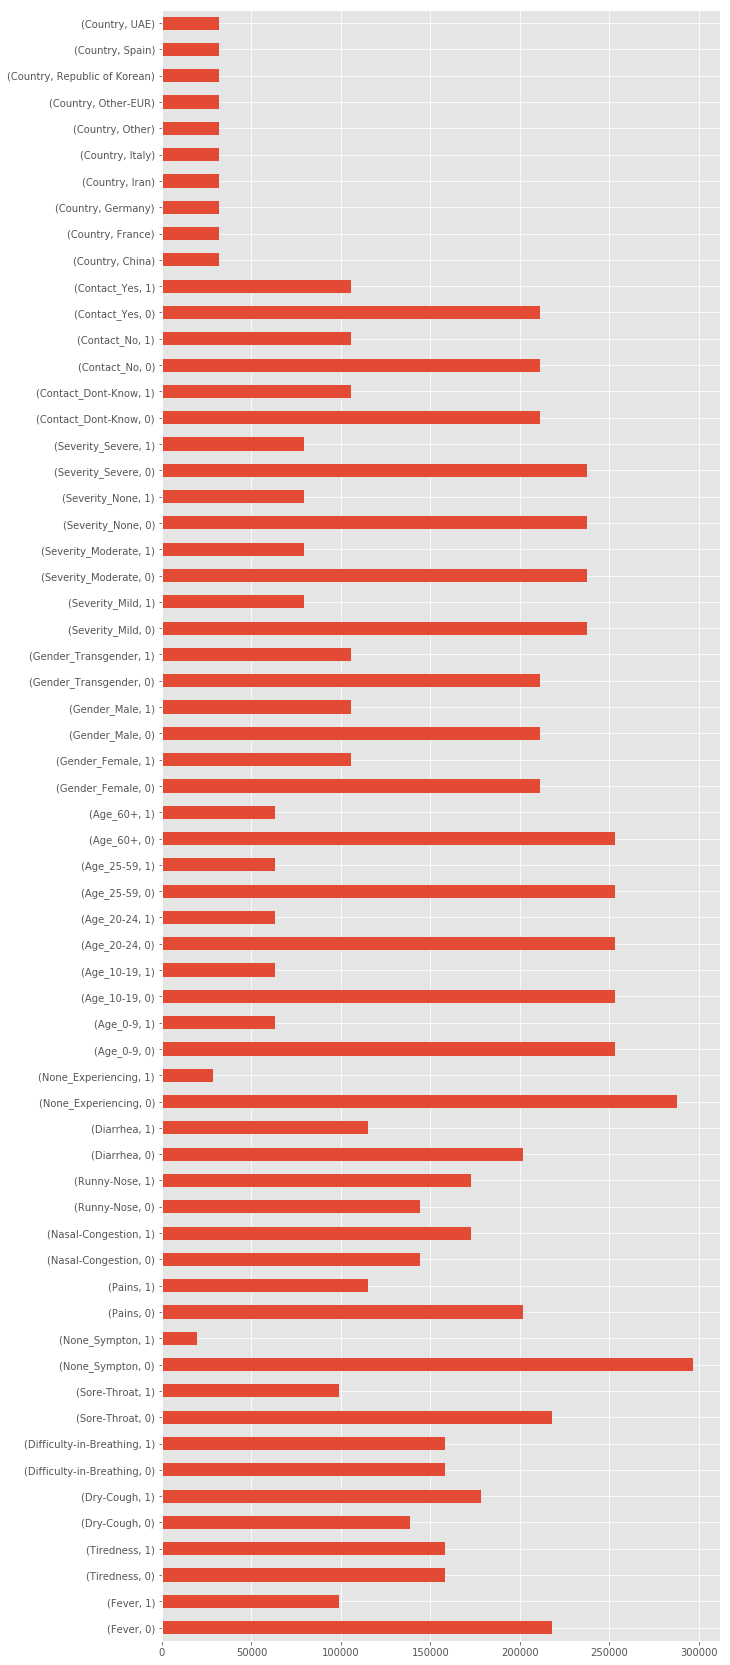

In [66]:
graph.plot(kind='barh', rot=0, figsize=(10, 30))